In [15]:
import pandas as pd
from re import sub as regex
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer as Stemmer
from imblearn.under_sampling import RandomUnderSampler

In [16]:
df = pd.read_csv("spam.csv", encoding="latin")
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df["type"] = (df["type"] == "spam").astype(int)
# Removes special characters - only letters and numbers remain + lowers text
df["filteredSMS"] = df["sms"].apply(lambda sms: regex(r"[^a-zA-Z0-9]", " ", sms.lower()))
# Utilizes NLTK to tokenize text
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: word_tokenize(sms))
# Utilizes removes NLTK stopwords from sms
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [word for word in sms if word not in stopwords.words("english")])
# Removing SMS if SMS is empty after removing all stopwords
df = df.dropna()
# Utilizes NLTK Stemmer to stem words
df["filteredSMS"] = df["filteredSMS"].apply(lambda sms: [Stemmer().stem(word) for word in sms])
# Saves the processed sms in a string
df["processedSMS"] = df["filteredSMS"].apply(lambda sms: " ".join(sms))
df.sample(5)

,type,sms,filteredSMS,processedSMS
5298,0,I.ll hand her my phone to chat wit u,"[hand, phone, chat, wit, u]",hand phone chat wit u
1407,0,Then we gotta do it after that,"[got, ta]",got ta
2292,0,:-( that's not v romantic!,"[v, romant]",v romant
3486,0,Change windows logoff sound..,"[chang, window, logoff, sound]",chang window logoff sound
1840,0,Yeah. I got a list with only u and Joanna if I...,"[yeah, got, list, u, joanna, feel, realli, ant...",yeah got list u joanna feel realli anti social


Ham (0) vs Spam (1)
0    4825
1     747
Name: type, dtype: int64


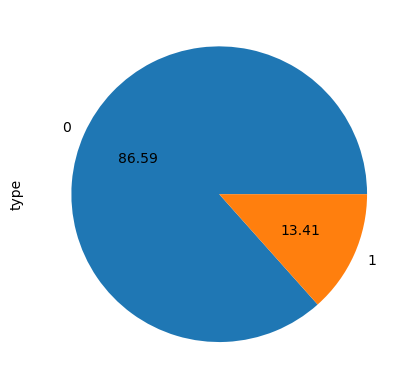

In [17]:
print("Ham (0) vs Spam (1)")
print(df["type"].value_counts())
df["type"].value_counts().plot.pie(autopct="%.2f")
plt.show()

Ham (0) vs Spam (1)
0    747
1    747
Name: type, dtype: int64


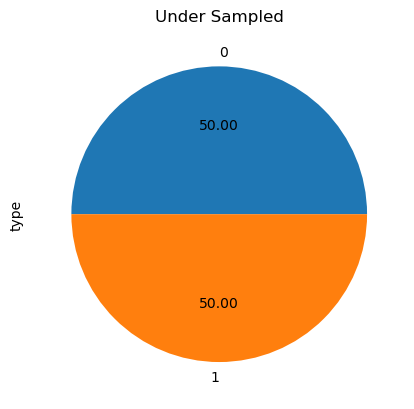

In [18]:
underSampler = RandomUnderSampler(sampling_strategy=1)
x, y = underSampler.fit_resample(df[["sms", "processedSMS", "filteredSMS"]], df["type"])

print("Ham (0) vs Spam (1)")
print(y.value_counts())
ax = y.value_counts().plot.pie(autopct="%.2f")
ax.set_title("Under Sampled")
plt.show()

In [19]:
underSampledSpam = pd.concat([y, x], axis=1)
underSampledSpam.sample(5)

,type,sms,processedSMS,filteredSMS
1488,1,PRIVATE! Your 2003 Account Statement for shows...,privat 2003 account statement show 800 un rede...,"[privat, 2003, account, statement, show, 800, ..."
472,0,Wat makes some people dearer is not just de ha...,wat make peopl dearer de happi dat u feel u me...,"[wat, make, peopl, dearer, de, happi, dat, u, ..."
1456,1,Someonone you know is trying to contact you vi...,someonon know tri contact via date servic find...,"[someonon, know, tri, contact, via, date, serv..."
638,0,Infact happy new year. How are you where are y...,infact happi new year see,"[infact, happi, new, year, see]"
963,1,HOT LIVE FANTASIES call now 08707509020 Just 2...,hot live fantasi call 08707509020 20p per min ...,"[hot, live, fantasi, call, 08707509020, 20p, p..."


In [20]:
underSampledSpam.to_csv("undersampled_spam.csv", encoding="latin")

In [21]:
# custom_embeds dictionary
english_dictionary = {"[pad]": 0, "[empty]": 1, "[number]": 2}
for sms in df["filteredSMS"]:
    for word in sms:
        if word not in english_dictionary and not any(character.isdigit() for character in word):
            english_dictionary[word] = len(english_dictionary)

# Writing Dictionary to py file
with open("dictionary.py", "w") as file:
     file.write("dictionary = ")
     file.write(str(english_dictionary))